![](https://i.imgur.com/mRnaHS1.jpg)
# Dota2 Games Results Data Set 
* Dota 2 is a popular computer game with **two teams** of **5 players**. At the start of the game **each player chooses a unique hero** with different strengths and weaknesses. The dataset is reasonably sparse as only 10 of 113 possible heroes are chosen in a given game. All games were played in a space of 2 hours on the 13th of August, 2016

[dataset](https://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results#)

In [147]:
import pandas as pd
train_path = 'dataset/dota2Train.csv'
test_path = 'dataset/dota2Test.csv'

train_data = pd.read_csv(train_path)
print(train_data.shape)

(92649, 117)


## Attribute Information
* **column1：** Team won the game (1 or -1)
    * dota類型的遊戲通常分成兩隊
    * 在這裡的1和-1分別代表左下和右上的隊伍
* **column2：** Cluster ID 
    * 這個是指玩家現實的區域
    * 111~114：US west，121~124：US east......等，詳細可見下方連結
    * [Cluster ID](https://github.com/kronusme/dota2-api/blob/master/data/regions.json)
* **column3：** Game mode
    * 玩家選擇英雄的模式，例如：all pick就是所有英雄任意選、Captains Mode則是可以進用某些英雄，在dota2有22種mode
    * [game mode](https://github.com/kronusme/dota2-api/blob/master/data/mods.json)
* **column4：** Game type
    * 遊戲種類，例如Ranked是會算分數（天梯）的模式、Solo Mid 1vs1是單挑模式
    * [game type](https://github.com/kronusme/dota2-api/blob/master/data/lobbies.json)
* **column5~end：** Each element is an indicator for a hero.
    * 剩餘欄位每一個欄位代表一個英雄，1代表有玩家選擇了此英雄且在隊伍1，-1亦然
    * [hero](https://github.com/kronusme/dota2-api/blob/master/data/heroes.json)
    

In [148]:
train_data.head()

,-1,223,2,2.1,0,0.1,0.2,0.3,0.4,0.5,...,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102
0,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
3,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,1,122,2,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1


## Preprocessing
### rename the feature
* 將每個feature name清楚標示
* 將hero編號，100~212

In [149]:
train_data = train_data.rename({'-1':'win_team', '223':'Cluster ID', '2':'Game mode', '2.1':'Game type'}, axis = 'columns')

i = 100
for t in train_data.columns[4:117]:
    train_data = train_data.rename({t:str(i)}, axis = 'columns')
    i = i + 1
    
train_data.head()

,win_team,Cluster ID,Game mode,Game type,100,101,102,103,104,105,...,203,204,205,206,207,208,209,210,211,212
0,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
3,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,1,122,2,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1


### reset Cluster ID
* 把同樣地區的代號歸類


In [150]:
for i in range(0, 92649):
    t = train_data['Cluster ID'][i]
    if t == 111 or t == 112 or t == 113 or t == 114:
        # US west
        train_data['Cluster ID'][i] = 0
    elif t == 121 or t == 122 or t == 123 or t == 124:
        # US east
        train_data['Cluster ID'][i] = 1
    elif t == 131 or t == 132 or t == 133 or t == 134 or t == 135 or t == 136 or t == 137 or t == 138:
        # Europe West
        train_data['Cluster ID'][i] = 2
    elif t == 142 or t == 143 or t == 144 or t == 145:
        # South Korea
        train_data['Cluster ID'][i] = 3
    elif t == 151 or t == 152 or t == 153 or t == 154 or t == 155 or t == 156:
        # Southest Asia
        train_data['Cluster ID'][i] = 4
    elif t == 161 or t == 163 or t == 221 or t == 222 or t == 223 or t == 224 or t == 225 or t == 227 or t == 231 or t == 232:
        # China
        train_data['Cluster ID'][i] = 5
    elif t == 171:
        # Australia
        train_data['Cluster ID'][i] = 6
    elif t == 181 or t == 182 or t == 183 or t == 184 or t == 185 or t == 186 or t == 187 or t == 188:
        # Russia
        train_data['Cluster ID'][i] = 7
    elif t == 191 or t == 192:
        # Europe East
        train_data['Cluster ID'][i] = 8
    elif t == 200 or t == 202 or t == 203 or t == 204:
        # South America
        train_data['Cluster ID'][i] = 9
    elif t == 211 or t == 212 or t == 213:
        # South Africa
        train_data['Cluster ID'][i] = 10
    elif t == 241 or t == 242:
        # Chile
        train_data['Cluster ID'][i] = 11
    elif t == 251:
        # Peru
        train_data['Cluster ID'][i] = 12
    elif t == 261:
        # India
        train_data['Cluster ID'][i] = 13
        
print(train_data['Cluster ID'].value_counts())

4     40843
5     25596
7      8982
2      5442
1      2703
3      2444
8      1751
0      1642
9      1463
6      1122
13      262
12      154
11      127
10      118
Name: Cluster ID, dtype: int64


### Make x_train and y_train

In [151]:
x_train = train_data['win_team']
y_train = train_data.drop('win_team', axis = 1)
print(x_train.head())
print(y_train.head())

0    1
1    1
2    1
3   -1
4    1
Name: win_team, dtype: int64
   Cluster ID  Game mode  Game type  100  101  102  103  104  105  106 ...   \
0           4          2          2    0    0    0    1    0   -1    0 ...    
1           2          2          2    0    0    0    1    0   -1    0 ...    
2           4          2          2    0    0    0    0    0    0   -1 ...    
3           6          2          3    0    0    0    0    0   -1    0 ...    
4           1          2          3    0    1    0    0    0    0    0 ...    

   203  204  205  206  207  208  209  210  211  212  
0    0    0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0    0    0  
2   -1    0    0    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0    0    0    0  
4    1    0    0    0    0    0    0    0    0   -1  

[5 rows x 116 columns]


## Feature Analysis
### 玩家人數分佈
* southest asia玩家為最大宗，china次之

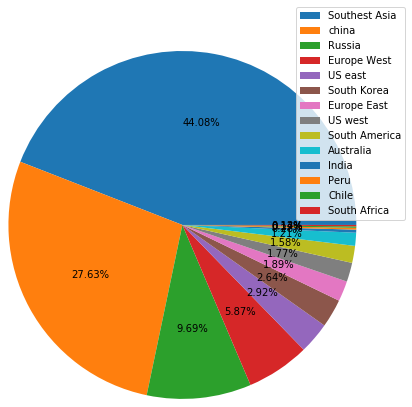

In [152]:
import matplotlib.pyplot as plt
plt.pie(train_data['Cluster ID'].value_counts(), autopct='%1.2f%%', radius = 2)
label = ['Southest Asia', 'china', 'Russia', 'Europe West', 'US east', 'South Korea', 'Europe East', 'US west', 'South America', 'Australia', 'India', 'Peru', 'Chile', 'South Africa']
plt.legend(label, fontsize = 10, bbox_to_anchor = (1, 0.5))
plt.show()

### 兩隊勝率
* 此資料集取了9萬多場比賽的數據，照理說兩隊勝率該要趨近50%，但位於下方的隊伍明顯勝率更高一些？
    * 探討後發現，因為dota遊戲的界面在下面，因此人物在下方的隊伍可以同時獲得更多資訊
    * 另一個說法是視角問題，玩家顯示器顯示的是地圖上的一個梯形，導致螢幕下方訊息量較多，上方較少

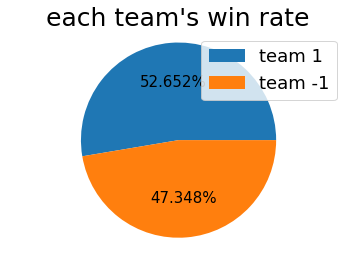

In [153]:
x = train_data['win_team'].value_counts()[1]
y = train_data['win_team'].value_counts()[-1]

label = ['team 1', 'team -1']
plt.pie([x, y], autopct='%1.3f%%', textprops = {'fontsize':15})
plt.axis('equal')
plt.legend(label, fontsize = '18')
plt.title("each team's win rate", fontsize = '25')
plt.show()

### game mode analysis
* 最熱門的遊戲模式為編號2的Captains Mode，編號8和9的Reverse Captains Mode和Greeviling也有部份場次，其餘皆很少

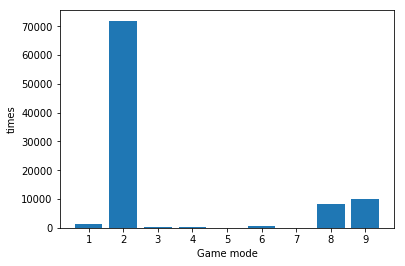

In [154]:
x = train_data['Game mode'].value_counts().index
y = train_data['Game mode'].value_counts().values

plt.bar(x, y)
plt.xticks(x)
plt.xlabel('Game mode')
plt.ylabel('times')
plt.show()

### game type analysis

In [103]:
train_data['Game type'].value_counts()

2    56987
3    35647
1       15
Name: Game type, dtype: int64

### Heroes with top 5 win rate 
* 最高勝率為編號152的英雄，有55.6%，次之為編號190，有52.7%

In [279]:
import collections
l1 = [i for i in range(100, 213)]
l2 = [0 for i in range(100, 213)]
win_rate = dict(zip(l1, l2))
for i in train_data.columns[4:117]:
    if train_data[i].value_counts().size != 1:
        r = train_data[i].value_counts()[1] / (train_data[i].value_counts()[1] + train_data[i].value_counts()[-1])
        win_rate[int(i)] = r

srt_win_rate = sorted(win_rate.items(), key=lambda kv: kv[1], reverse = True)

print(srt_win_rate[0:5])



[(152, 0.5567478332645481), (190, 0.5276381909547738), (212, 0.5231714126186487), (165, 0.5189873417721519), (188, 0.5140155352921311)]
